
# 13. This question should be answered using the Weekly data set, which is part of the ISLP package. 

This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [442]:
import pandas as pd
import numpy as np

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize)
from ISLP import confusion_table

from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import statsmodels.api as sm

import matplotlib.pyplot as plt

In [443]:
weekly = load_data("Weekly") 
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


**Dataset**

Weekly percentage returns for the S&P 500 stock index between 1990 and 2010.
The term "percentage return" in finance typically refers to the percentage change in the price of a stock or an index over a given period.

The variable in the dataset includes:

1. Year: The year that the observation was recorded
2. Lag1: Percentage return for previous week
3. Lag2: Percentage return for 2 weeks previous
4. Lag3: Percentage return for 3 weeks previous
5. Lag4: Percentage return for 4 weeks previous
6. Lag5: Percentage return for 5 weeks previous
7. Volume: Volume of shares traded (average number of daily shares traded in billions)
8. Today: Percentage return for this week
9. Direction: A factor with levels ‘Down’ and ‘Up’ indicating whether the market had a positive or negative return on a given week.




## (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [444]:
weekly.shape

(1089, 9)

In [445]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [446]:
weekly.nunique()

Year           21
Lag1         1004
Lag2         1005
Lag3         1005
Lag4         1005
Lag5         1005
Volume       1089
Today        1003
Direction       2
dtype: int64

**The Direction column is categorical and there is not a single null values for any columns which is good.**

In [447]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


1. The average percentage return for all of lag variables is nearly same, but std is 2.3 means, for some weeks the percentage return was near to the average value, but for some week it decrease or increase means up and down. 

2. The min and max values is supporting the above. 

3. The values between 25% to 75% are showing that there is high levarage of outliers in the data, that the difference between 25% to 75% of the data is small but beyond this are very large.

4. But when we see the min and max value for all of the column we can see all the columns has same min and max values, so we cannot either say there is outliers or high levarage points in the data. 

5. For some weeks average no of daily shares was too high, but for some these were low. 

In [448]:
weekly.corr()

/var/folders/xq/6knst1p10zx6vcf03b4zyf300000gn/T/ipykernel_5693/2100277423.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weekly.corr()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


**There is highly correlation between the year and volumn.**

**The low correlation suggest that there is no linear relationship between the columns**

<Axes: >

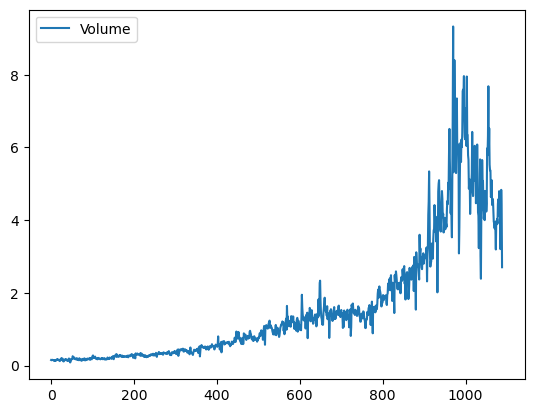

In [449]:
weekly.plot(y='Volume')

**As the year progress the average number of daily share increase.**

## (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors.
Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?


In [450]:
allvars = weekly.columns.drop(['Today', 'Direction', 'Year']) 
design = MS(allvars)

X = design.fit_transform(weekly)
y = weekly.Direction == 'Up'

glm = sm.GLM(y, X, family=sm.families.Binomial()) 
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


**Yes, the lag2 variable is statistically significant**


## (c) Compute the confusion matrix and overall fraction of correct predictions. 
Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [451]:
probs = results.predict()

In [452]:
labels = np.array(['Down'] * weekly.shape[0]) 
labels[probs>0.5] = "Up"

In [453]:
confusion_table(labels, weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [454]:
(54+557)/weekly.shape[0], np.mean(labels == weekly.Direction)

(0.5610651974288338, 0.5610651974288338)

## (d) Now fit the logistic regression model using a training data period from 1990 to 2008,
with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [455]:
train = (weekly.Year <= 2008)

weekly_train = weekly.loc[train] 
weekly_train = weekly_train[['Lag2', 'Direction']]

weekly_test = weekly.loc[~train] 
weekly_test = weekly_test[['Lag2', 'Direction']]

weekly_train.shape, weekly_test.shape

((985, 2), (104, 2))

In [456]:
allvars = weekly_train.columns.drop(['Direction']) 

design = MS(allvars)

X_train_lr = design.fit_transform(weekly_train)
y_train_lr = weekly_train.Direction == 'Up'

glm = sm.GLM(y_train_lr, X_train_lr, family=sm.families.Binomial()) 
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2033,0.064,3.162,0.002
Lag2,0.0581,0.029,2.024,0.043


In [457]:
X_test, y_test= weekly_test[['Lag2']], weekly_test[['Direction']]

In [458]:
design = MS(X_test)

X_test_lr = design.fit_transform(X_test)

In [459]:
probs = results.predict(exog=X_test_lr)

In [460]:
labels = np.array(['Down'] * y_test.shape[0]) 
labels[probs>0.5] = "Up"

In [461]:
confusion_table(labels, y_test.Direction)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [462]:
np.mean(labels == y_test.Direction)

0.625

## (e) Repeat (d) using LDA.

In [463]:
X_train, y_train = weekly_train[['Lag2']], weekly_train[['Direction']]

In [464]:
lda = LDA(store_covariance=True)

In [465]:
lda.fit(X_train, y_train)

/Users/khayam/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(store_covariance=True)

In [466]:
lda.means_

array([[-0.03568254],
       [ 0.26036581]])

In [467]:
lda.priors_

array([0.44771574, 0.55228426])

In [468]:
lda.scalings_

array([[0.44141622]])

In [469]:
lda_pred = lda.predict(X_test)

In [470]:
confusion_table(lda_pred, y_test.Direction)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [471]:
np.mean(lda_pred == y_test.Direction)

0.625

## (f) Repeat (d) using QDA.

In [472]:
qda = QDA(store_covariance=True) 
qda.fit(X_train, y_train)

/Users/khayam/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QuadraticDiscriminantAnalysis(store_covariance=True)

In [473]:
qda.means_, qda.priors_

(array([[-0.03568254],
        [ 0.26036581]]),
 array([0.44771574, 0.55228426]))

In [474]:
qda.covariance_

[array([[4.83781758]]), array([[5.37073888]])]

In [475]:
qda_pred = qda.predict(X_test) 
confusion_table(qda_pred, y_test)

Truth,Direction,Up
Predicted,,
Direction,0,0
Up,0,61


In [476]:
np.mean(qda_pred == y_test.Direction)

0.5865384615384616

## (g) Repeat (d) using KNN with K = 1.

In [486]:
knn1 = KNeighborsClassifier(n_neighbors=1) 
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test) 
confusion_table(knn1_pred, y_test.Direction)

/Users/khayam/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Truth,Down,Up
Predicted,,
Down,21,30
Up,22,31


In [489]:
np.mean(knn1_pred == y_test.Direction)

0.5

## (h) Repeat (d) using naive Bayes.

In [490]:
NB = GaussianNB() 
NB.fit(X_train, y_train)

/Users/khayam/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [491]:
NB.classes_

array(['Down', 'Up'], dtype='<U4')

In [492]:
NB.class_prior_

array([0.44771574, 0.55228426])

In [493]:
NB.theta_

array([[-0.03568254],
       [ 0.26036581]])

In [494]:
NB.var_

array([[4.82684748],
       [5.3608662 ]])

In [495]:
nb_labels = NB.predict(X_test) 
confusion_table(nb_labels, y_test)

Truth,Direction,Up
Predicted,,
Direction,0,0
Up,0,61


In [497]:
np.mean(nb_labels == y_test.Direction)

0.5865384615384616

## (i) Which of these methods appears to provide the best results on this data?

## (j) Experiment with different combinations of predictors, including possible transformations and interactions, 
for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.